# Introduction to Deep Learning with Keras  
Keras is a high-level neural networks API, capable of running on top of Tensorflow, Theano and CNTK. It enables fast experimentation through a high level, user friendly, modular and extensible API. Keras can also be run on both CPU and GPU.  

For more information check out the [corresponding article](https://towardsdatascience.com/introduction-to-deep-learning-with-keras-17c09e4f0eb2).

In [17]:
%matplotlib inline

## Loading dataset

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
(x_train.shape[1:])

(28, 28, 1)

In [6]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
(x_train.shape[1:], 1)

((28, 28, 1), 1)

## Creating convolutional neural network

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])

In [11]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

In [23]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# creating datagenerator for augmenting images
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1)

## Training model

In [25]:
epochs = 3
batch_size = 32

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                              validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//batch_size)

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1037 - acc: 0.9741 - val_loss: 0.0445 - val_acc: 0.9908
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0879 - acc: 0.9781 - val_loss: 0.0259 - val_acc: 0.9937
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0835 - acc: 0.9788 - val_loss: 0.0321 - val_acc: 0.9926
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0819 - acc: 0.9792 - val_loss: 0.0264 - val_acc: 0.9936
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0790 - acc: 0.9790 - val_loss: 0.0220 - val_acc: 0.9938


## Analyzing results

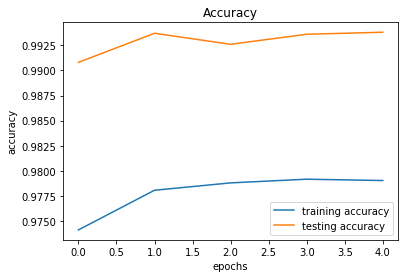

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

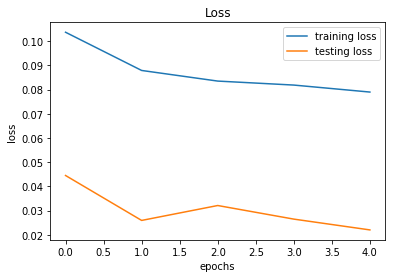

In [27]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()